# Part 1, exploratory data analysis (EDA)

1. [1 балл] Загрузка данных - загрузите датасет, указав, что нулевой столбец - это индекс датасета. Посмотрите на его `head` и `tail`. Давайте перекодируем текстовые переменные sex и  smoker, чтобы с ними было удобнее работать. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Укажите параметр `include` равным `all`, чтобы отобразить метрики для всех столбцов датасета. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. Какая самая часто встречающаяся страна происхождения вина? 
2. [1 балл] Какая средняя цена вин? А медианная оценка?
3. [1 балл] Сколько вин перепробовал господин Kerin O’Keefe? 
4. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какая переменная сильнее всего скоррелирована со стоимостью страховки? Почему? А как скоррелирован возраст со стоимостью? 
5. [1 балл] Визуализация - постройте при помощи `plt.scatter` график, где по оси x будет переменная points, а по оси y - цена. Видно ли по  графику, что более дорогие вина, в среднем, получают более высокую оценку? 
6. [2 балла] Визуализация + группировка - давайте посмотрим, как цена вина зависит от страны происхождения. Для этого сгруппируйте данные по переменной `country` при помощи `groupby` и примените функцию `mean()` к столбцу `price`. Далее добавьте `.sort_values()`, чтобы  отсортировать полученные значения. Наконец, добавьте конструкцию `.plot.bar()` для отображения на графике средних цен. Кто делает, в среднем, самые дорогие вина? А самые дешевые?
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать два каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 9 баллов, отлично!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, с загрузкой данных справились :)

In [199]:
data = pd.read_csv('C:/Users/HP/Desktop/data2/Tkachuk_Ekaterina_winemag-data-130k-v2.csv', index_col = 0)
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [200]:
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [201]:
data.tail(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [202]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


In [203]:
data.country.count()

129908

In [206]:
data1 = data.groupby('country').count()
data1 = data1.sort_values(by = 'points', ascending = False)
data1[0:1]

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,
US,54504,36908,54504,54265,54504,54226,50511,37730,34741,54504,54504,54504


### Комментарий к решению
Всё верно

In [205]:
print('median',data.price.median())
print('mean',data.price.mean())

median 25.0
mean 35.363389129985535


### Комментарий к решению
Интересная работа у человека  ;)

In [210]:
z= int(data.loc[:,['taster_name']][data['taster_name']=='Kerin O’Keefe'].count())
print('Сколько вин перепробовал господин Kerin O’Keefe',z)

Сколько вин перепробовал господин Kerin O’Keefe 10776


### Комментарий к решению
Прошу прощения, неверное задание отправил, но визуализацию построить всё-таки удалось, и это хорошо :)

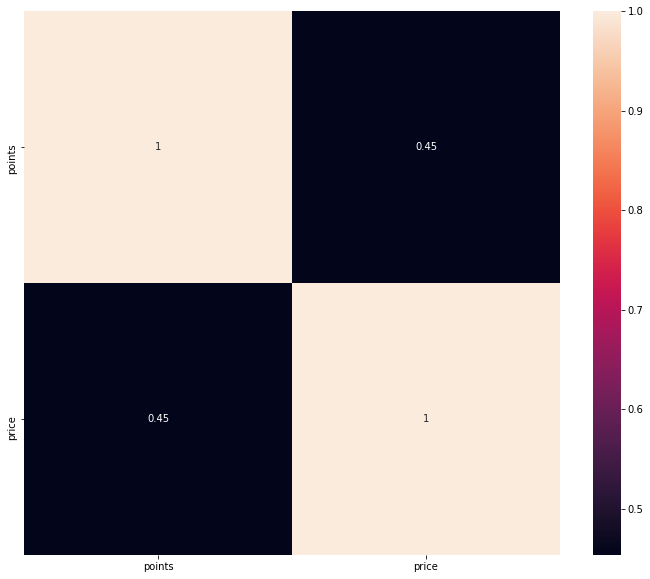

In [215]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr('kendall'), annot=True);

### Комментарий к решению
Отлично 

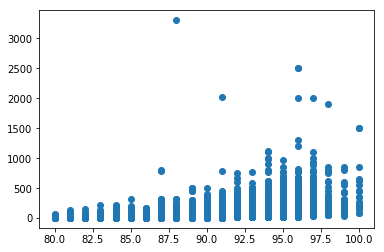

In [241]:
plt.scatter(x=data['points'], y=data['price'])
#На графике видно, что более дорогие вина имеют более хорошие оценки#

### Комментарий к решению
Так у кого самые дорогие и дешевые? Можно было еще вот так визуализировать ;)

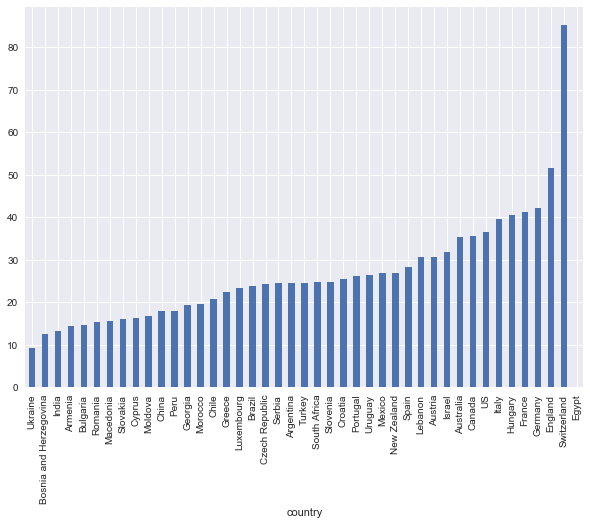

In [5]:
data.groupby('country').price.mean().sort_values().plot.bar(figsize=(10, 7));

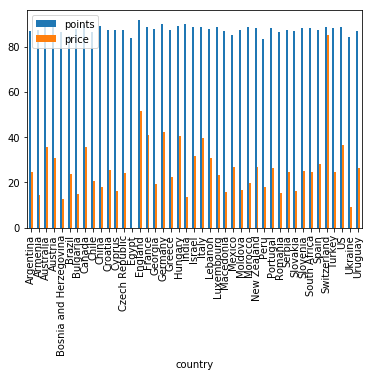

In [240]:
data2 = data.groupby('country').mean()
data2.sort_values(by = 'price', ascending = True)
data2.plot.bar()

### Комментарий к решению
Да уж, дороговато

In [248]:
#Самое дорогое вино и страна его происхождения#
dataW = data.drop(['description', 'designation', 'points', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'], axis=1)
data3 = dataW.sort_values(by = 'price', ascending = False)
data3[0:1]

,country,price,province,region_1,region_2
80290,France,3300.0,Bordeaux,Médoc,NaN


### Комментарий к решению
Внезапный вопрос :D

In [253]:
z= int(data.loc[:,['price']][data['taster_name']=='Roger Voss'].mean())
print('Средняя цена вин, которые оценил Roger Voss:',z)

Средняя цена вин, которые оценил Roger Voss: 38
